In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import re

output_dir = "./outputa"
regex = r"box(\d+)_temp(\d+\.\d+).txt"

def output_list(path="./hw8"):
    return [f for f in os.listdir(path) if f.endswith('.txt')]

def read(filename):
    res_ls = []
    with open(os.path.join(output_dir, filename), "r") as f:
        lines = f.readlines()
        params = lines[0].rstrip(" \n").split(" ")
        boxsize = int(params[2])

        # for i in range(0, len(lines) - 1, boxsize + 2):
        for i in range(0, len(lines) - 1, 1):
            params = lines[i].rstrip("\n").split(" ")
            res_ls.append(list(map(int, params[3:])))
    return res_ls

In [2]:
data = {8: {}, 16: {}, 32: {}}

data_ls = output_list(output_dir)
for datapath in data_ls:
    # match
    match = re.match(regex, datapath)
    if match:
        boxsize = int(match.group(1))
        temp = float(match.group(2))
        data[boxsize][temp] = read(datapath)

temp_np = np.arange(1.5, 3.1, 0.1, dtype=float)
m2_np   = np.zeros((len(temp_np), 3))
c_np    = np.zeros((len(temp_np), 3))
chi_np  = np.zeros((len(temp_np), 3))
for (boxsize, value) in data.items():
    match boxsize:
        case 8: idx = 0;
        case 16: idx = 1;
        case 32: idx = 2;
    for (temp, data) in value.items():
        temp_idx = np.where(np.isclose(temp_np, temp))[0][0]
        data_np = np.array(data)
        e_np = data_np[:, 0]; m_np = data_np[:, 1]
        e_mean = np.mean(e_np); e2_mean = np.mean(e_np ** 2)
        m_mean = np.mean(m_np); m2_mean = np.mean(np.abs(m_np) ** 2)
        m_absmean = np.mean(np.abs(m_np))
        m2_np[temp_idx, idx] = m2_mean / boxsize ** 4
        c_np[temp_idx, idx] = (e2_mean - e_mean ** 2) / (temp ** 2) / boxsize ** 2
        chi_np[temp_idx, idx] = (m2_mean - m_absmean ** 2) / temp / boxsize ** 2

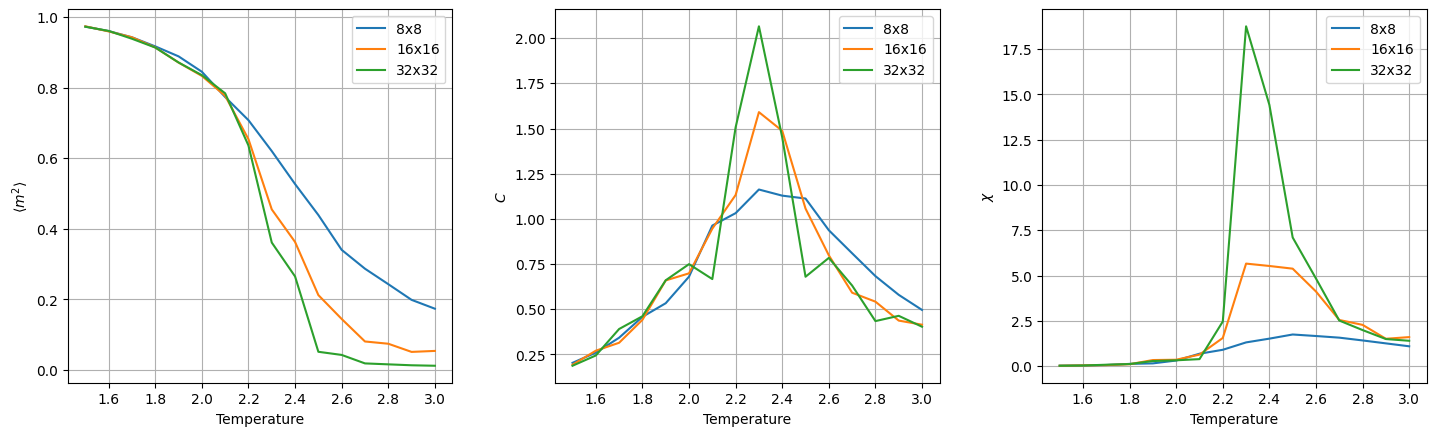

In [3]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].plot(temp_np, m2_np[:, 0], label="8x8")
axes[0].plot(temp_np, m2_np[:, 1], label="16x16")
axes[0].plot(temp_np, m2_np[:, 2], label="32x32")
axes[0].set_xlabel("Temperature")
axes[0].set_ylabel(r"$\langle m^2 \rangle$")
axes[0].grid()
axes[0].legend()
axes[1].plot(temp_np, c_np[:, 0], label="8x8")
axes[1].plot(temp_np, c_np[:, 1], label="16x16")
axes[1].plot(temp_np, c_np[:, 2], label="32x32")
axes[1].set_xlabel("Temperature")
axes[1].set_ylabel(r"$C$")
axes[1].grid()
axes[1].legend()
axes[2].plot(temp_np, chi_np[:, 0], label="8x8")
axes[2].plot(temp_np, chi_np[:, 1], label="16x16")
axes[2].plot(temp_np, chi_np[:, 2], label="32x32")
axes[2].set_xlabel("Temperature")
axes[2].set_ylabel(r"$\chi$")
axes[2].grid()
axes[2].legend()
plt.tight_layout(pad=3)
plt.show()

In [4]:
import numpy as np
from math import exp, log

L = 4
N = L * L
total_configs = 2 ** N

energy_counts = {}

for n in range(total_configs):
    h_edges = 0
    v_edges = 0
    for i in range(L):
        for j in range(L):
            pos = i * L + j
            spin = 1 if (n >> (N - 1 - pos)) & 1 else -1
            
            right_j = (j + 1) % L
            pos_right = i * L + right_j
            spin_right = 1 if (n >> (N - 1 - pos_right)) & 1 else -1
            h_edges += spin * spin_right
            
            down_i = (i + 1) % L
            pos_down = down_i * L + j
            spin_down = 1 if (n >> (N - 1 - pos_down)) & 1 else -1
            v_edges += spin * spin_down
    
    H = -(h_edges + v_edges)
    if H in energy_counts:
        energy_counts[H] += 1
    else:
        energy_counts[H] = 1

Z = 0.0
E_total = 0.0

for H, count in energy_counts.items():
    w = count * exp(-H)
    Z += w
    E_total += H * w

E_avg = E_total / Z
F = -log(Z)

print(f"E: {E_avg:.4f}")
print(f"F: {F:.4f}")

E: -31.9545
F: -32.6987


In [13]:
check = read("../4.out")
check_np = np.array(check)
# get e mean
e_mean = np.mean(check_np[:, 0])
print(f"e mean: {e_mean:.4f}")

e mean: -31.9506
